# Kaggle Spaceship Titanic

* link for the problem
> https://www.kaggle.com/competitions/spaceship-titanic/overview

## Data explaination
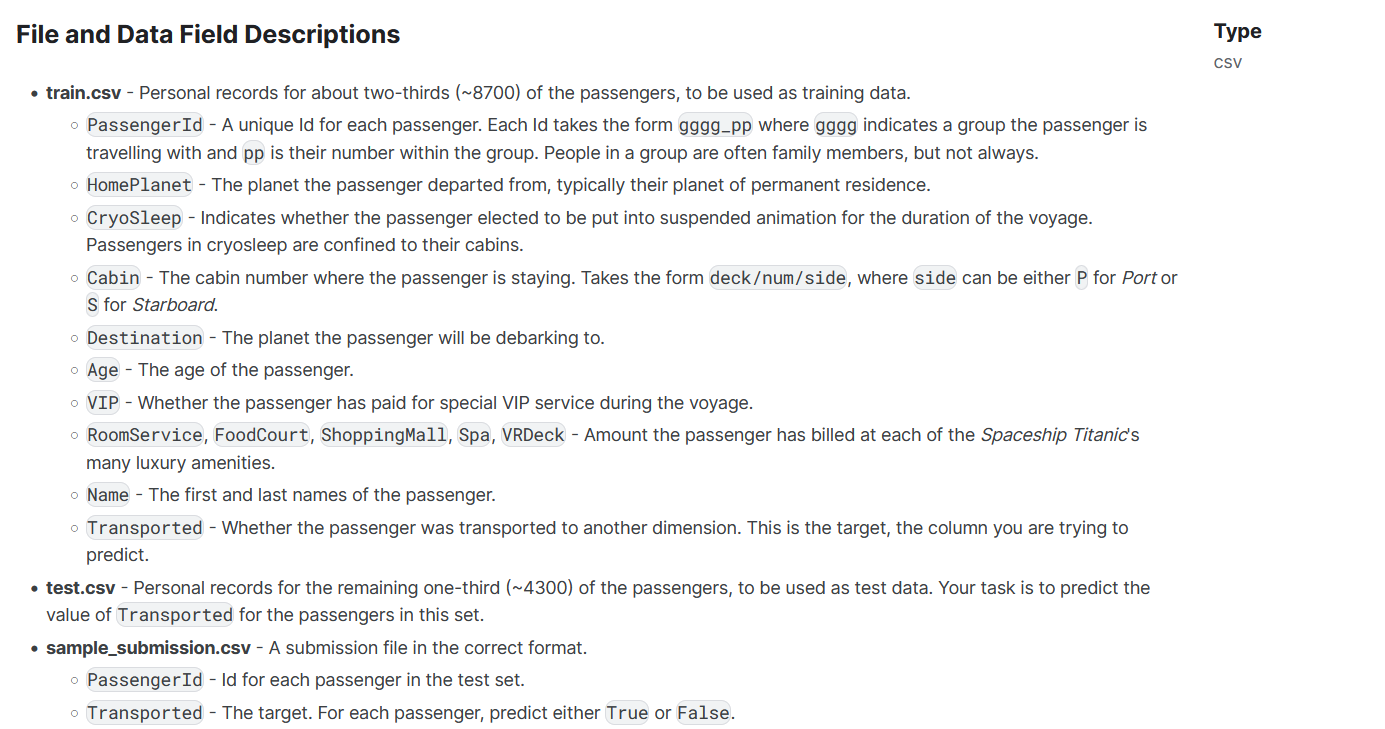

## More explaination on the data
* cryoSleep
  * akno naym mabyt7rksh
* output
  * Transported or not

### lets import our main libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### First lets read the data

In [11]:
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

In [12]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### lets separate the passenger ID

In [14]:
passengerID = train_df.PassengerId
passengerID

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

### check for nulls

In [15]:
train_df.isnull().mean() * 100 

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [16]:
test_df.isnull().mean() * 100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

### Lets fill the nulls
* scheme: 
* homePlanet -> categorical so we can fill it using the mod
* CryoSleep -> categorical so we can fill it using the mod
* Destination -> categorical so we can fill it using the mod
* VIP -> categorical so we can fill it using the mod
* Age -> numerical so we can use [mean, median, mod], but I will choose the median.
* roomService, FoodCourt, ShoppingMall, SPA, VRDeck -> numerical so we can use [mean, median, mod], but I will choose the mean
* Name -> it is not important at all so lets drop it. 
* Transported is the output so we will separate it later.

In [31]:
train_df['Age'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: object>

### Filling data

In [28]:
# fillna(thing you will fill with, inplace or not)
train_df.HomePlanet.fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df.CryoSleep.fillna(train_df['CryoSleep'].mode()[0], inplace=True)
train_df.Destination.fillna(train_df['Destination'].mode()[0], inplace=True)
train_df.VIP.fillna(train_df['VIP'].mode()[0], inplace=True)
train_df.Age.fillna(train_df['Age'].median, inplace=True)
train_df.RoomService.fillna(train_df['RoomService'].mean(), inplace=True)
train_df.FoodCourt.fillna(train_df['FoodCourt'].mean(), inplace=True)
train_df.ShoppingMall.fillna(train_df['ShoppingMall'].mean(), inplace=True)
train_df.Spa.fillna(train_df['Spa'].mean(), inplace=True)
train_df.VRDeck.fillna(train_df['VRDeck'].mean(), inplace=True)


### Filling Tests

In [32]:
test_df.HomePlanet.fillna(test_df['HomePlanet'].mode()[0], inplace=True)
test_df.CryoSleep.fillna(test_df['CryoSleep'].mode()[0], inplace=True)
test_df.Destination.fillna(test_df['Destination'].mode()[0], inplace=True)
test_df.VIP.fillna(test_df['VIP'].mode()[0], inplace=True)
test_df.Age.fillna(test_df['Age'].median, inplace=True)
test_df.RoomService.fillna(test_df['RoomService'].mean(), inplace=True)
test_df.FoodCourt.fillna(test_df['FoodCourt'].mean(), inplace=True)
test_df.ShoppingMall.fillna(test_df['ShoppingMall'].mean(), inplace=True)
test_df.Spa.fillna(test_df['Spa'].mean(), inplace=True)
test_df.VRDeck.fillna(test_df['VRDeck'].mean(), inplace=True)


### view the data after filling 

In [33]:
train_df.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,118.000000,45.000000,89.000000,71.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [34]:
test_df.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,219.266269,439.484296,177.295525,303.052443,310.710031
std,601.162847,1508.609201,554.357251,1103.913087,1235.274606
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,143.000000,51.000000,83.000000,53.000000
max,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [35]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### converting categorical data into numeric
* Categorical data: 
  1. homePlanet 
  2. CryoSleep 
  2. Destination 
  2. VIP 